In [2]:
import pandas as pd
from math import ceil
import numpy as np
import pydot as pt
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv", sep = ',')#, dtype = 'a')
columns = data.columns

In [4]:
data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,14095,10.00,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,13759,12.60,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,3914,8.40,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,47953,9.00,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,7047,6.20,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


In [5]:
# usefull data
df = data[columns[:12]]

In [6]:
# how many brewerid = 1 beers are in the data
data[columns][data['beer/brewerId'] == 1].shape

(1017, 19)

In [7]:
# how many brewer are in the data
data[columns[3]].unique().shape

(212,)

In [8]:
df_names = data[columns[4:6]]
df_names.describe()

,beer/name,beer/style
count,37500,37500
unique,1688,95
top,Founders Breakfast Stout,American Double / Imperial Stout
freq,1883,4495


In [42]:
data[columns[5]].unique()

array(['Herbed / Spiced Beer', 'American Barleywine',
       'American Pale Ale (APA)', 'Czech Pilsener', 'English Pale Ale',
       'Russian Imperial Stout', 'American Wild Ale', 'Pumpkin Ale',
       'English Barleywine', 'American IPA', 'Scotch Ale / Wee Heavy',
       'American Double / Imperial Stout', 'Euro Pale Lager',
       'Maibock / Helles Bock', 'American Amber / Red Ale', 'Rye Beer',
       'American Double / Imperial IPA', 'MÃ¤rzen / Oktoberfest',
       'Fruit / Vegetable Beer', 'Witbier', 'Light Lager', 'Rauchbier',
       'American Porter', 'Hefeweizen',
       'Extra Special / Strong Bitter (ESB)', 'Wheatwine',
       'English Strong Ale', 'Braggot', 'Euro Strong Lager',
       'Munich Helles Lager', 'English India Pale Ale (IPA)', 'Altbier',
       'Doppelbock', 'American Brown Ale', 'Munich Dunkel Lager',
       'Irish Dry Stout', 'KÃ¶lsch', 'Foreign / Export Stout',
       'Cream Ale', 'Lambic - Unblended', 'Scottish Ale', 'Baltic Porter',
       'Belgian IPA', 'Ol

In [9]:
# TODO: match the brewers in the data2 dataset with the brewer id from df
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000


In [10]:
col = df.columns
col[6:13]

Index(['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste', 'review/text'],
      dtype='object')

In [32]:
df[df['beer/style'] == 'American Amber / Red Ale']

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
17,38293,9.20,46670,16386,Dank Imperial Red,American Amber / Red Ale,4.0,3.5,4.0,4.0,3.5,Thanks to exiled for sharing this bottle.\t\tT...
138,15512,6.00,34461,1199,Founders Amber,American Amber / Red Ale,3.5,4.0,3.5,3.0,4.0,Pourd a dark copper color but had very little ...
149,36025,5.50,56887,3268,Hemp Hop Rye Amber Ale,American Amber / Red Ale,3.5,4.5,4.5,4.5,4.0,"A - Dark, nutty brown with some cloudiness to ..."
157,2254,5.00,74676,26990,Ramble On Red,American Amber / Red Ale,3.5,4.0,4.0,4.0,4.0,On tap at Duckworths in Ballantyne. Served in ...
171,2331,6.80,69866,23246,Hud-a-wa' Strong,American Amber / Red Ale,3.5,4.0,3.5,3.5,3.5,330ml bottle thanks to Chris@Slowbeer.\t\tRuby...
208,6314,5.70,48556,21516,Kirkland Signature Amber Ale,American Amber / Red Ale,3.0,3.0,3.0,3.0,3.5,I was very hesitant to drink this based on the...
341,46095,6.20,54059,394,Stoudts Winter Ale (2009-2010),American Amber / Red Ale,4.0,3.5,4.0,4.0,4.0,"A: Pours a glowing, slightly hazy orange-amber..."
369,6329,5.70,48556,21516,Kirkland Signature Amber Ale,American Amber / Red Ale,4.0,3.5,3.5,3.5,3.5,"Fresh 12 0z bottle, ""best by"" dated June 18, 2..."
467,7517,5.00,14242,765,Portside Amber Premium Ale,American Amber / Red Ale,3.0,3.5,3.5,3.0,3.5,The first thing i noticed after pouring this w...
639,6365,5.70,48556,21516,Kirkland Signature Amber Ale,American Amber / Red Ale,3.5,3.0,2.0,2.5,3.0,Chilled 12oz bottle into a glass. Part of my f...


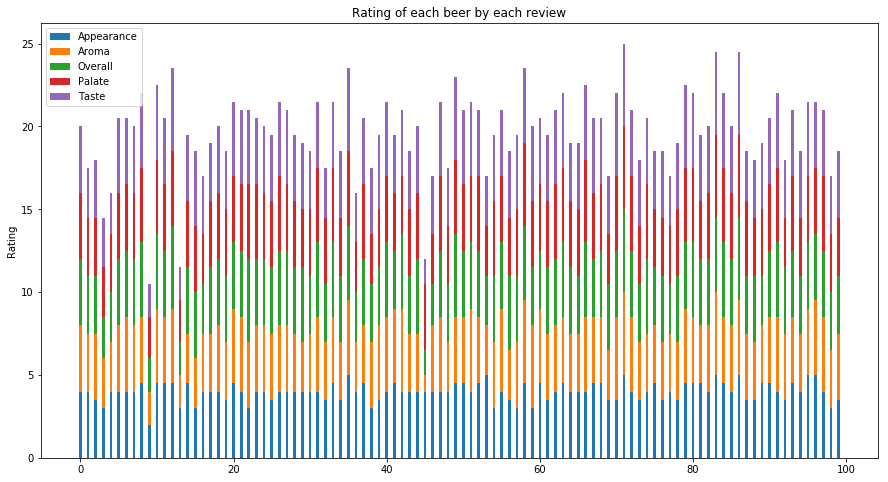

In [19]:
df1 = df[0:100]
ind = df1.index.values 
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df1['review/appearance'], width)
p2 = plt.bar(ind, df1['review/aroma'], width, bottom=df1['review/appearance'])
p3 = plt.bar(ind, df1['review/overall'], width, bottom=df1['review/aroma'] + df1['review/appearance'])
p4 = plt.bar(ind, df1['review/palate'], width, bottom=df1['review/overall']+df1['review/aroma'] + df1['review/appearance'])
p5 = plt.bar(ind, df1['review/taste'], width, bottom=df1['review/palate']+df1['review/overall']+df1['review/aroma'] + df1['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of each beer by each review')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))


plt.show();

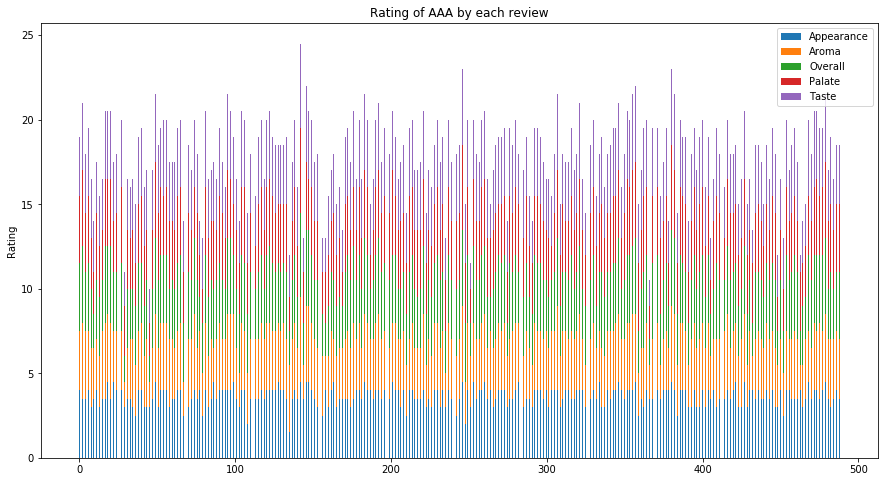

In [35]:
df1 = df[df['beer/style'] == 'American Amber / Red Ale'] # Just American Ambar/red Ale
ind = range(len(df1))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df1['review/appearance'], width)
p2 = plt.bar(ind, df1['review/aroma'], width, bottom=df1['review/appearance'])
p3 = plt.bar(ind, df1['review/overall'], width, bottom=df1['review/aroma'] + df1['review/appearance'])
p4 = plt.bar(ind, df1['review/palate'], width, bottom=df1['review/overall']+df1['review/aroma'] + df1['review/appearance'])
p5 = plt.bar(ind, df1['review/taste'], width, bottom=df1['review/palate']+df1['review/overall']+df1['review/aroma'] + df1['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of AAA by each review')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))


plt.show();

In [44]:
data2 = pd.read_csv("recipe.csv", sep = ',', dtype = 'a')
columns2 = data2.columns

In [45]:
data2

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.07,70,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.8,54.48,...,NaN,70,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50,1.06,1.01,6.48,17.84,...,1.05,72,NaN,Specific Gravity,All Grain,NaN,19,Sukkerlake,6-7 g sukker/l,18325
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79,NaN,Specific Gravity,All Grain,1,NaN,NaN,NaN,5889
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,...,NaN,75,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,1.04,70,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.06,1.016,5.77,31.63,...,1.042,73,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116
9,10,Mango Habanero IPA,/homebrew/recipe/view/61082/mango-habanero-ipa,Imperial IPA,86,20.82,1.08,1.017,8.22,93.02,...,1.058,70,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C,NaN


In [46]:
data2.describe()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
count,73861,73860,73861,73265,73861,73861,73861,73861,73861,73861,...,70871,73861,43997,73861,73861,34609,51199,6766,4774,23371
unique,73861,59148,73861,175,176,1065,2036,1958,1502,12587,...,509,272,567,2,4,9,217,874,1896,2785
top,46524,Awesome Recipe,/homebrew/recipe/view/463893/hefewiezen-3-2017,American IPA,7,20.82,1.052,1.012,5.24,0,...,1.044,70,1.5,Specific Gravity,All Grain,0.35,20,Corn Sugar,5 oz,34210
freq,1,1311,1,11940,11940,16714,2932,7346,309,4159,...,2502,21298,15499,71959,49692,9477,14185,715,205,319


In [47]:
# Beers recepies. There are more than in reviews, and especifically AAA apear in both 
data2[columns2[3]].unique()

array(['Cream Ale', 'Holiday/Winter Special Spiced Beer', 'American IPA',
       'Belgian Blond Ale', 'American Pale Ale', 'Imperial IPA',
       'Robust Porter', 'Bohemian Pilsener', 'Saison',
       'Northern English Brown', 'English IPA', 'Traditional Bock',
       'Premium American Lager', 'Belgian Golden Strong Ale', nan,
       'Double IPA', 'Blonde Ale', 'Light American Lager',
       'German Pilsner (Pils)', 'American Brown Ale', 'Oatmeal Stout',
       'Specialty Beer', 'American Amber Ale', 'Kˆlsch', 'Witbier',
       'Weizen/Weissbier', 'Trappist Single', 'Russian Imperial Stout',
       'Specialty IPA: Black IPA', 'Sweet Stout', 'Strong Scotch Ale',
       'Belgian Tripel', 'American Stout', 'Belgian Pale Ale',
       'Dark American Lager', 'Dry Stout', 'Belgian Dark Strong Ale',
       'American Wheat or Rye Beer', 'Vienna Lager',
       'Special/Best/Premium Bitter', 'Experimental Beer',
       'Irish Red Ale', 'Old Ale', 'Extra Special/Strong Bitter (ESB)',
       'Winte

In [74]:
import re

result = []
for i in data2.URL:
    temp = re.search('/homebrew/recipe/view/(.*)/', i)
    result.append(temp.group(1))

In [80]:
brewers = [int(i) for i in result]

In [87]:
from itertools import groupby
[len(list(group)) for key, group in groupby(brewers)]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [83]:
brewer_count = 0

for i in range(len(df)):
    if df['beer/brewerId'][i] in brewers:
        brewer_count += 1

In [84]:
brewer_count

1152